In [1]:
#Exercise

import os, sys

sys.path.insert(1, "D:\\ThinkDSP\\code\\")

import numpy as np
import matplotlib.pyplot as plt
from numpy import bartlett, blackman, hamming, hanning, kaiser
from thinkdsp import SinSignal, decorate, SawtoothSignal, Chirp

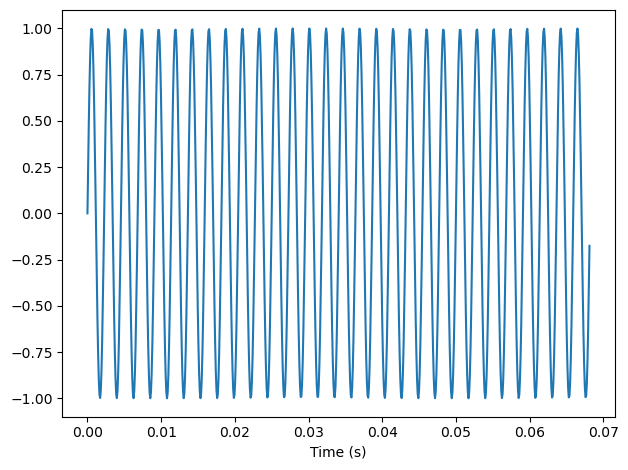

In [2]:
signal = SinSignal(freq=440)
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

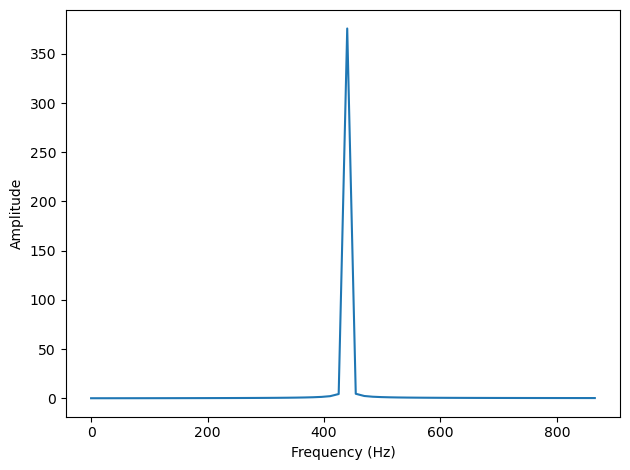

In [3]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

The above leakage is good since the duration is an exact multiple of the period (30 in this case).
If the duration is not a multiple of a period, the leakage will be pretty bad.

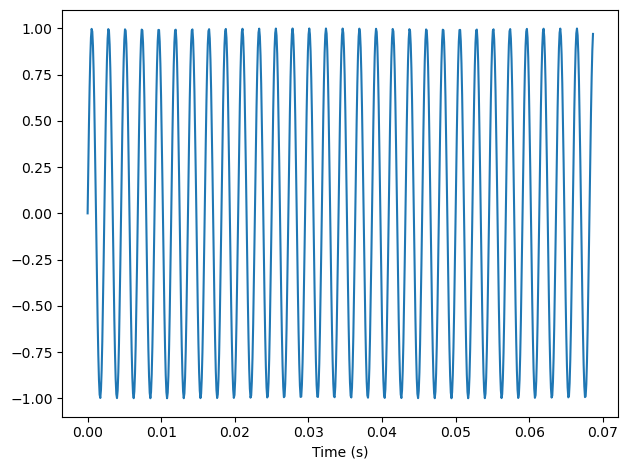

In [4]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

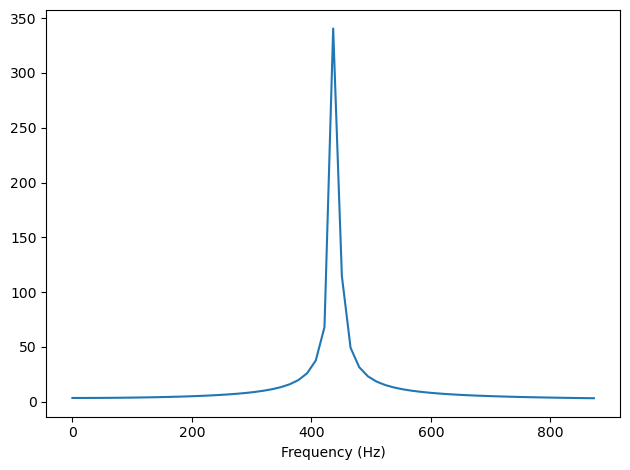

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Windowing helps (but notice that it reduces the total energy). See the energy go down from 350

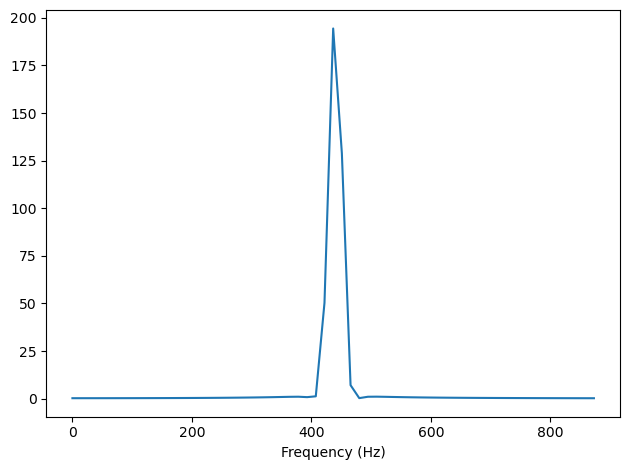

In [6]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

# EXERCISE 1
Replace the hamming window above with the other windows available. 
hamming, bartlett, blackman, hanning, and kaiser

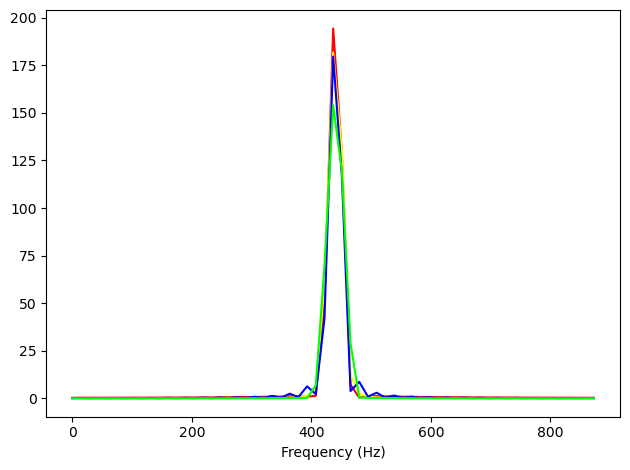

In [7]:
duration = signal.period * 30.25

#hamming
wave = signal.make_wave(duration)
wave.ys *= np.hamming(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, color='red')

#hanning
wave = signal.make_wave(duration)
wave.ys *= np.hanning(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, color='yellow')

#bartlett
wave = signal.make_wave(duration)
wave.ys *= np.bartlett(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, color='blue')

#blackman
wave = signal.make_wave(duration)
wave.ys *= np.blackman(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, color='lime')




decorate(xlabel='Frequency (Hz)')

# Exercise 2
Write a class called SawtoothChirp that extends Chrip and overrides evaluate to generate a sawtooth waveform with frequency that increases or decreases linearly

In [11]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

PI2 = np.pi*2

class SawtoothChirp(Chirp):
    
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

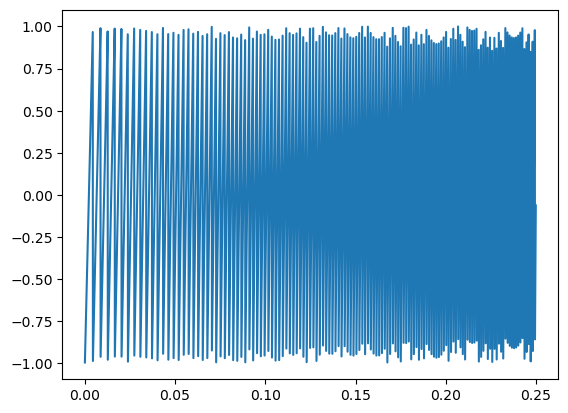

In [12]:
SawtoothChirp(start=220, end=880).make_wave(duration=.25).plot()

In [23]:
class SquareChirp(Chirp):
    
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = freqs * ts + phases/PI2
        frac, _ = np.modf(cycles)
        ys =  self.amp * np.sign(unbias(frac))
        return ys

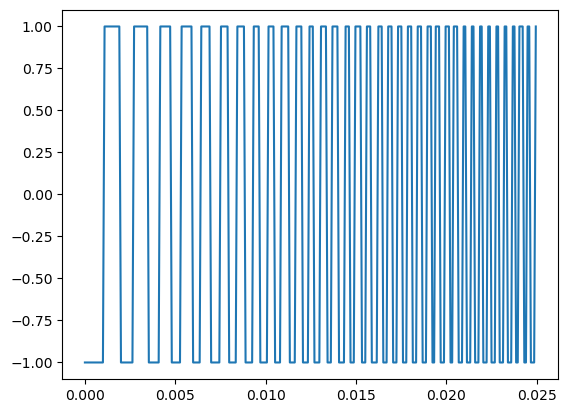

In [25]:
SquareChirp(start=220, end=880).make_wave(duration=.025).plot()